# **Modeling Sentiment Analysis of Instagram App Reviews on the Google Play Store**

<h3>Nama : Muh.Alif Alfattah Riu</h3>
<h3>Username : alif_riu</h3>
<h3>Email : alifalfattah12@gmail.com</h3>

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import Callback, EarlyStopping
import matplotlib.pyplot as plt

# **Data Splitting and Feature Extraction with Tokenizer**

In [2]:
df = pd.read_csv('/content/instagram_scrapping_data.csv')
df.head()

,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,sentiment_score,sentiment
0,Tolong diperbaiki dong bug suara yg dipostinga...,Tolong diperbaiki dong bug suara yg dipostinga...,tolong diperbaiki dong bug suara yg dipostinga...,tolong diperbaiki dong bug suara yang dipostin...,"['tolong', 'diperbaiki', 'dong', 'bug', 'suara...","['tolong', 'diperbaiki', 'bug', 'suara', 'dipo...",tolong diperbaiki bug suara dipostingan postin...,9,positive
1,over all semua update an nya bagus dari fitur ...,over all semua update an nya bagus dari fitur ...,over all semua update an nya bagus dari fitur ...,over all semua update an nya bagus dari fitur ...,"['over', 'all', 'semua', 'update', 'an', 'nya'...","['update', 'bagus', 'fitur', 'instagram', 'pos...",update bagus fitur instagram post videofoto la...,3,positive
2,"Gatau ig skrng banyak bug nya. Mulai dari, pos...",Gatau ig skrng banyak bug nya Mulai dari posti...,gatau ig skrng banyak bug nya mulai dari posti...,gatau ig skrng banyak bug nya mulai dari posti...,"['gatau', 'ig', 'skrng', 'banyak', 'bug', 'nya...","['gatau', 'ig', 'skrng', 'bug', 'postingan', '...",gatau ig skrng bug postingan suaranya simbol s...,9,positive
3,Sudah beberapa hari lagu yg ada dipostingan hi...,Sudah beberapa hari lagu yg ada dipostingan hi...,sudah beberapa hari lagu yg ada dipostingan hi...,sudah beberapa hari lagu yang ada dipostingan ...,"['sudah', 'beberapa', 'hari', 'lagu', 'yang', ...","['lagu', 'dipostingan', 'hilang', 'suaranyapad...",lagu dipostingan hilang suaranyapadahal ketera...,-4,negative
4,Sering eror! Kemarin bug tiba-tiba akun ke log...,Sering eror Kemarin bug tibatiba akun ke log o...,sering eror kemarin bug tibatiba akun ke log o...,sering eror kemarin bug tibatiba akun ke log o...,"['sering', 'eror', 'kemarin', 'bug', 'tibatiba...","['eror', 'kemarin', 'bug', 'tibatiba', 'akun',...",eror kemarin bug tibatiba akun log bikin ig st...,4,positive


In [3]:
category = pd.get_dummies(df.sentiment, dtype=int)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='sentiment')
new_df

,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,sentiment_score,negative,neutral,positive
0,Tolong diperbaiki dong bug suara yg dipostinga...,Tolong diperbaiki dong bug suara yg dipostinga...,tolong diperbaiki dong bug suara yg dipostinga...,tolong diperbaiki dong bug suara yang dipostin...,"['tolong', 'diperbaiki', 'dong', 'bug', 'suara...","['tolong', 'diperbaiki', 'bug', 'suara', 'dipo...",tolong diperbaiki bug suara dipostingan postin...,9,0,0,1
1,over all semua update an nya bagus dari fitur ...,over all semua update an nya bagus dari fitur ...,over all semua update an nya bagus dari fitur ...,over all semua update an nya bagus dari fitur ...,"['over', 'all', 'semua', 'update', 'an', 'nya'...","['update', 'bagus', 'fitur', 'instagram', 'pos...",update bagus fitur instagram post videofoto la...,3,0,0,1
2,"Gatau ig skrng banyak bug nya. Mulai dari, pos...",Gatau ig skrng banyak bug nya Mulai dari posti...,gatau ig skrng banyak bug nya mulai dari posti...,gatau ig skrng banyak bug nya mulai dari posti...,"['gatau', 'ig', 'skrng', 'banyak', 'bug', 'nya...","['gatau', 'ig', 'skrng', 'bug', 'postingan', '...",gatau ig skrng bug postingan suaranya simbol s...,9,0,0,1
3,Sudah beberapa hari lagu yg ada dipostingan hi...,Sudah beberapa hari lagu yg ada dipostingan hi...,sudah beberapa hari lagu yg ada dipostingan hi...,sudah beberapa hari lagu yang ada dipostingan ...,"['sudah', 'beberapa', 'hari', 'lagu', 'yang', ...","['lagu', 'dipostingan', 'hilang', 'suaranyapad...",lagu dipostingan hilang suaranyapadahal ketera...,-4,1,0,0
4,Sering eror! Kemarin bug tiba-tiba akun ke log...,Sering eror Kemarin bug tibatiba akun ke log o...,sering eror kemarin bug tibatiba akun ke log o...,sering eror kemarin bug tibatiba akun ke log o...,"['sering', 'eror', 'kemarin', 'bug', 'tibatiba...","['eror', 'kemarin', 'bug', 'tibatiba', 'akun',...",eror kemarin bug tibatiba akun log bikin ig st...,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
14995,"Apa apaan nih, saya di blokir sama seseorang d...",Apa apaan nih saya di blokir sama seseorang di...,apa apaan nih saya di blokir sama seseorang di...,apa apa ini saya di blokir sama seseorang di a...,"['apa', 'apa', 'ini', 'saya', 'di', 'blokir', ...","['blokir', 'akun', 'mencarinya', 'akun', 'blok...",blokir akun mencarinya akun blokir akun terdaf...,-5,1,0,0
14996,Apaan sih makin update makin nggak jelas tidak...,Apaan sih makin update makin nggak jelas tidak...,apaan sih makin update makin nggak jelas tidak...,apa sih makin update makin tidak jelas tidak b...,"['apa', 'sih', 'makin', 'update', 'makin', 'ti...","['update', 'memuat', 'beranda', 'relog', 'unin...",update memuat beranda relog uninstall download...,-1,1,0,0
14997,"Aku kasih bintang dua aja, instagram sekarang ...",Aku kasih bintang dua aja instagram sekarang u...,aku kasih bintang dua aja instagram sekarang u...,aku kasih bintang dua saja instagram sekarang ...,"['aku', 'kasih', 'bintang', 'dua', 'saja', 'in...","['kasih', 'bintang', 'instagram', 'udh', 'kaya...",kasih bintang instagram udh kaya kena limit ma...,-5,1,0,0
14998,Saya mau tanya Knpa setiap beberapa detik seha...,Saya mau tanya Knpa setiap beberapa detik seha...,saya mau tanya knpa setiap beberapa detik seha...,saya mau tanya kenapa setiap beberapa detik se...,"['saya', 'mau', 'tanya', 'kenapa', 'setiap', '...","['detik', 'sehabis', 'masuk', 'kedalam', 'apli...",detik sehabis masuk kedalam aplikasi aplikasi ...,-9,1,0,0


In [4]:
X = new_df['text_akhir'].values
y = new_df[['negative','neutral','positive']].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"X_train = {X_train.shape}, X_test = {X_test.shape}, y_train = {y_train.shape}, y_test = {y_test.shape}")

X_train = (12000,), X_test = (3000,), y_train = (12000, 3), y_test = (3000, 3)


In [7]:
# Convert the numeric values in X_train and X_test to strings
X_train = X_train.astype(str)
X_test = X_test.astype(str)

In [8]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

padded_train = pad_sequences(sequence_train, padding="post", truncating="post", maxlen=50)
padded_test = pad_sequences(sequence_test,  padding="post", truncating="post", maxlen=50)

# **Building Deep Learning model using LSTM**

In [10]:
model = Sequential([
    Embedding(input_dim=50000, output_dim=16),
    Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(units=128, return_sequences=True),
    LSTM(units=64),
    Dense(units=128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    BatchNormalization(momentum=0.99),
    Dense(units=3, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          800000    
                                                                 
 conv1d (Conv1D)             (None, None, 32)          1568      
                                                                 
 max_pooling1d (MaxPooling1  (None, None, 32)          0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, None, 128)         82432     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                        

In [12]:
class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.85 and logs.get('val_accuracy') > 0.85):
          print("\nAkurasi telah mencapai >85%")
          self.model.stop_training = True

callbacks = myCallback()

In [13]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    padded_train,
    y_train,
    steps_per_epoch = 375,
    validation_steps = 60,
    epochs=30,
    validation_data=(padded_test, y_test),
    verbose=2,
    callbacks=[callbacks, early_stopping])

Epoch 1/30
375/375 - 29s - loss: 1.0622 - accuracy: 0.5614 - val_loss: 0.7211 - val_accuracy: 0.7553 - 29s/epoch - 79ms/step
Epoch 2/30
375/375 - 21s - loss: 0.5009 - accuracy: 0.8204 - val_loss: 0.4408 - val_accuracy: 0.8250 - 21s/epoch - 55ms/step
Epoch 3/30

Akurasi telah mencapai >85%
375/375 - 24s - loss: 0.3369 - accuracy: 0.8805 - val_loss: 0.4099 - val_accuracy: 0.8583 - 24s/epoch - 63ms/step


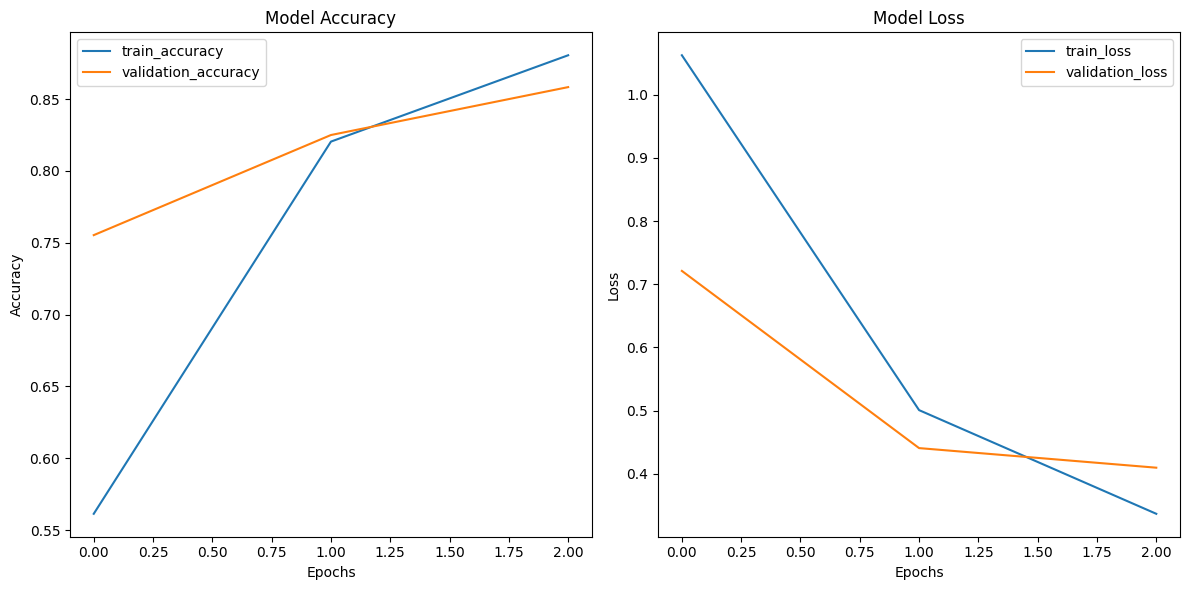

In [14]:
# Buat sebuah figure dengan ukuran yang ditentukan
plt.figure(figsize=(12, 6))

# Plot untuk accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot untuk loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Tampilkan plot yang telah digabungkan
plt.tight_layout()
plt.show()

In [ ]:
!pip freeze > requirements_model.txt